In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset, drop index, and view head
df = pd.read_csv('Data/clean_data.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Assess cost per minute for each call category
df['cost_per_day_call'] = df['total_day_charge'] / df['total_day_minutes']
df['cost_per_intl_call'] = df['total_intl_charge'] / df['total_intl_minutes']
df['cost_per_night_call'] = df['total_night_charge'] / df['total_night_minutes']
df['cost_per_eve_call'] = df['total_eve_charge'] / df['total_eve_minutes']

night_call_per_min = np.mean(df['cost_per_night_call'])
eve_call_per_min = np.mean(df['cost_per_eve_call'])
intl_call_per_min = np.mean(df['cost_per_intl_call'])
day_call_per_min = np.mean(df['cost_per_day_call'])

print(f'Day Cost/Min: ${round(day_call_per_min, 2)}')
print(f'Night Cost/Min: ${round(night_call_per_min, 2)}')
print(f'Eve Cost/Min: ${round(eve_call_per_min, 2)}')
print(f'International Cost/Min: ${round(intl_call_per_min, 2)}')

Day Cost/Min: $0.17
Night Cost/Min: $0.05
Eve Cost/Min: $0.09
International Cost/Min: $0.27


Day calls are four times as much as night calls and twice as much as eve calls. 

In [4]:
# create a column for total charges across all 4 call categories (intl, day, eve, churn)
df['total_spend'] = df.total_day_charge + df.total_eve_charge + df.total_night_charge + df.total_intl_charge

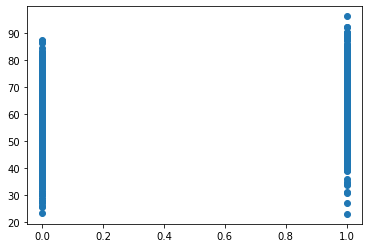

In [5]:
# scatter plot for total spend against churn
plt.scatter(x = df['churn'], y = df['total_spend'])

It does look like the people spending the most have a higher churn, but I will need a better visual to really know.

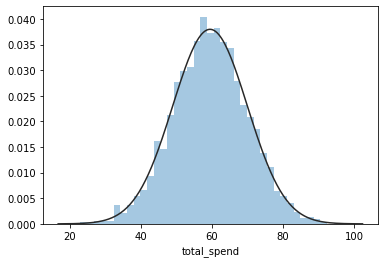

In [6]:
sns.distplot(df['total_spend'], fit=norm, kde=False)
plt.show()

There is a normal distribution for total spend, most clients spend $50-70, and the vaues are symetrical on either side of the curve.

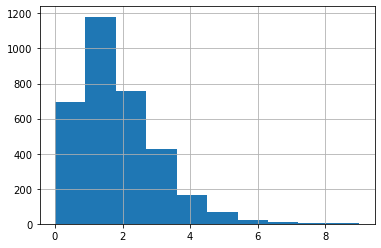

In [7]:
df['customer_service_calls'].hist()

In [8]:
# create a new data frame with only the clients who churned
df_churned = df[df.churn != False]
df_churned.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,...,12.7,6,3.43,4,True,0.170023,0.270079,0.045019,0.084989,54.20
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,...,5.4,9,1.46,4,True,0.169991,0.270370,0.045019,0.084991,92.29
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,...,5.7,6,1.54,5,True,0.170032,0.270175,0.044990,0.084991,36.02
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,...,11.8,3,3.19,1,True,0.169992,0.270339,0.045004,0.084984,79.68
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,...,14.6,15,3.94,0,True,0.170017,0.269863,0.045008,0.084993,56.20


In [9]:
# create a new column for clients who did or did not call customer service on both dataframes
df_churned['called_cs'] = df_churned['customer_service_calls'] >=1
df['called_cs'] = df['customer_service_calls'] >=1

display(df.head())
display(df_churned.head())

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend,called_cs
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,3,2.70,1,False,0.170011,0.270000,0.044994,0.085005,75.56,True
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,3,3.70,1,False,0.169988,0.270073,0.045008,0.085013,59.24,True
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,5,3.29,0,False,0.170008,0.269672,0.045018,0.084983,62.29,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,7,1.78,2,False,0.170007,0.269697,0.044997,0.084976,66.80,True
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,3,2.73,3,False,0.170006,0.270297,0.044997,0.085030,52.09,True


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,customer_service_calls,churn,cost_per_day_call,cost_per_intl_call,cost_per_night_call,cost_per_eve_call,total_spend,called_cs
10,IN,65,415,no,no,0,129.1,137,21.95,228.5,...,6,3.43,4,True,0.170023,0.270079,0.045019,0.084989,54.20,True
15,NY,161,415,no,no,0,332.9,67,56.59,317.8,...,9,1.46,4,True,0.169991,0.270370,0.045019,0.084991,92.29,True
21,CO,77,408,no,no,0,62.4,89,10.61,169.9,...,6,1.54,5,True,0.170032,0.270175,0.044990,0.084991,36.02,True
33,AZ,12,408,no,no,0,249.6,118,42.43,252.4,...,3,3.19,1,True,0.169992,0.270339,0.045004,0.084984,79.68,True
41,MD,135,408,yes,yes,41,173.1,85,29.43,203.9,...,15,3.94,0,True,0.170017,0.269863,0.045008,0.084993,56.20,False


In [10]:
sum(df_churned['called_cs'] == True) / len(df_churned['called_cs'])

0.8095238095238095

In [11]:
sum(df['called_cs'] == True) / len(df['called_cs'])

0.7908790879087909

79% of all clients have made one or more customer service calls and 81% of all churned clients made one call or more. These numbers are fairly proportionate, across all clients and churned clients. I would still like to break this down further by checking if there is a certain number of calls that may be a strong indicator of churn. 

In [12]:
# view the values and counts for customer service calls for only the churned clients
df_churned['customer_service_calls'].value_counts()

1    122
0     92
2     87
4     76
3     44
5     40
6     14
7      5
9      2
8      1
Name: customer_service_calls, dtype: int64

In [13]:
# view the values and counts for customer service calls for all clients
df['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

Just visually, it does seem that a greater proportion of clients will churn after 4 or 5 calls. I can assess this by calculating the churn rate for each additional phone call.

In [14]:
# calculate the churn rate for each number of phone calls
churn_by_cs_calls = []

for x in range(0,10):
    churn_by_cs_calls.append(round(sum(df_churned['customer_service_calls'] == x) / 
                             sum(df['customer_service_calls'] == x) * 100, 0))
churn_by_cs_calls

[13.0, 10.0, 11.0, 10.0, 46.0, 61.0, 64.0, 56.0, 50.0, 100.0]

In [15]:
# asses churn rate by one additional call or more. i.e. churn rate for 1+, 2+, 3+, etc.
churn_by_cs_calls_range = []

for x in range(0,10):
    churn_by_cs_calls_range.append(round(sum(df_churned['customer_service_calls'] >= x) / 
                             sum(df['customer_service_calls'] >= x) * 100, 0))
churn_by_cs_calls_range

[14.0, 15.0, 18.0, 26.0, 52.0, 61.0, 63.0, 62.0, 75.0, 100.0]

Over 50% of the clients making 4 or more customer service calls will churn. Churn really becomes an issue at the 4th call when churn jumps by nearly 5x. 

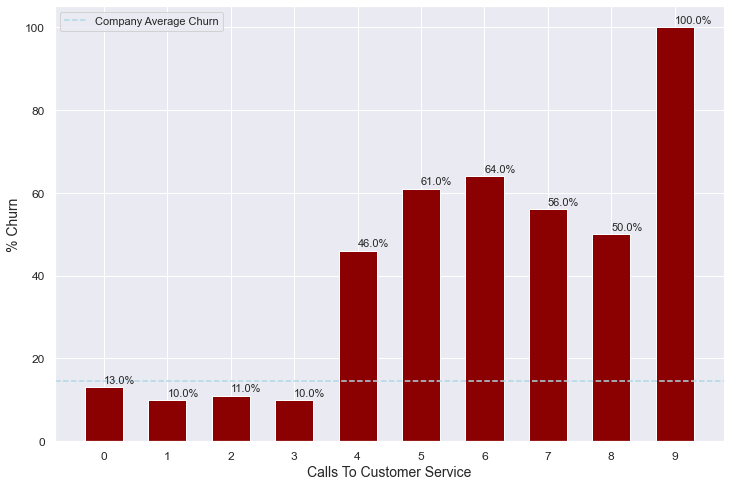

In [16]:
# plot churn for each additional phone call
sns.set()
x = range(0,10)
plt.figure(figsize=(12,8))
plt.bar(x=x, 
        height=churn_by_cs_calls,
        width = 0.6, 
        tick_label=x, 
        color='darkred')

for index,data in enumerate(churn_by_cs_calls):
    plt.text(x=index , 
             y =data+1 , 
             s=f"{data}%" , 
             fontdict=dict(fontsize=11)) # plot percentages over bars

plt.axhline(14.5, label='Company Average Churn', ls='--', color='lightblue') # plot average company churn
# assign x and y labels
plt.ylabel('% Churn', size=14)
plt.xlabel('Calls To Customer Service', size=14)
# increase size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# add a legend
plt.legend()
# show and save the image
fig1 = plt.gcf()
plt.show()
fig1.savefig('Visuals/tessstttyyy.png', dpi=100)

In [17]:
# churn rate for clients making 4 or more calls to customer service
sum(df_churned['customer_service_calls'] >= 4) / sum(df['customer_service_calls'] >= 4)

0.5168539325842697

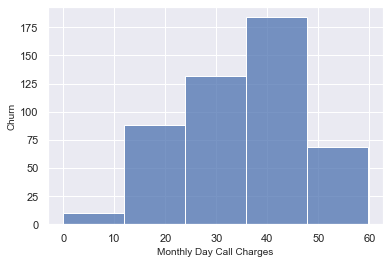

<Figure size 1080x576 with 0 Axes>

In [29]:
# visualize churn rate for day call charges only
sns.histplot(df_churned['total_day_charge'], bins=5)

plt.xlabel("Monthly Day Call Charges", size=10)
plt.ylabel("Churn", size=10)

plt.figure(figsize=(15,8))
plt.show()

In [19]:
# calculate churn rate for each bin in the histogram above
counts1, _ =  np.histogram(df['total_day_charge'], bins=5)

counts2, _ =  np.histogram(df_churned['total_day_charge'], bins=5)

day_churn_rate = counts2 / counts1
day_churn_rate

array([0.12345679, 0.12941176, 0.08198758, 0.21445221, 0.66346154])

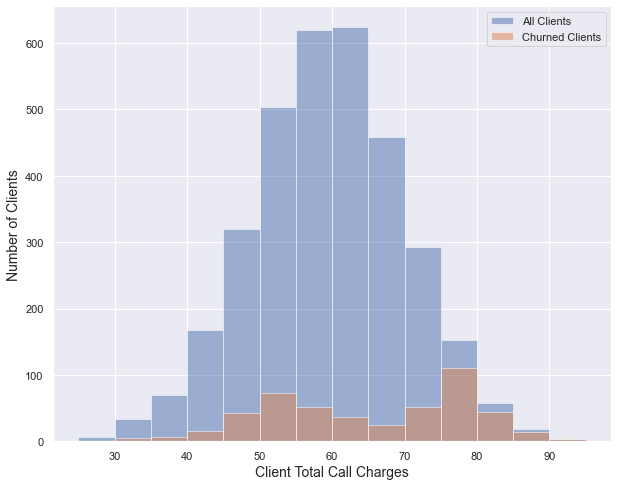

In [20]:
# plot the proportion of churned clients by charges against the total number 
# of clients within each price range
plt.figure(figsize=(10,8))
plt.hist(
         df['total_spend'], 
         bins=range(25, 100, 5), 
         alpha=0.5, 
         label="All Clients"
)
plt.hist(
         df_churned['total_spend'], 
         bins=range(25, 100, 5), 
         alpha=0.5, 
         label="Churned Clients"
)

plt.legend()

plt.xlabel('Client Total Call Charges', size=14)
plt.ylabel('Number of Clients', size=14)

fig4 = plt.gcf()
plt.show()
fig4.savefig('Visuals/proportions', dpi=100)

In [21]:
# calculate churn rate for each bin in the double histogram above
counts10, _ =  np.histogram(df['total_spend'], bins=range(20, 100, 5))
counts11, _ =  np.histogram(df_churned['total_spend'], bins=range(20, 100, 5))
counts11 / counts10

array([0.5       , 0.14285714, 0.15151515, 0.1       , 0.08928571,
       0.134375  , 0.14484127, 0.08387097, 0.05769231, 0.05458515,
       0.17406143, 0.7254902 , 0.75862069, 0.77777778, 1.        ])

In [22]:
# calculate churn rate for day charges by price bins
counts12, _ =  np.histogram(df['total_day_charge'], bins=range(20, 70, 5))
counts13, _ =  np.histogram(df_churned['total_day_charge'], bins=range(20,70,5))
day_change = list(counts13 / counts12)
x2 = [25,30,35,40,45,50,60]
day_change

[0.11860940695296524,
 0.11499272197962154,
 0.06119402985074627,
 0.10564663023679417,
 0.23529411764705882,
 0.5460526315789473,
 0.6739130434782609,
 1.0,
 nan]

In [23]:
# convert decimals to percentages
day_change = [11.86, 11.50, 6.12, 10.56, 23.53, 54.61, 74.14]

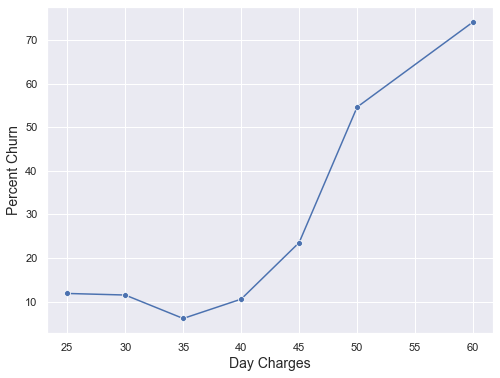

In [31]:
# plot churn rate for each $5 increase in day charges
plt.figure(figsize=(8,6))
sns.lineplot(x=x2, y=day_change, marker="o")
plt.xlabel('Day Charges', size=14)
plt.ylabel('Percent Churn', size=14)
fig5 = plt.gcf()
plt.show()
fig5.savefig('Visuals/fig5.png', dpi=100)

In [25]:
# caculate the day call charges proportion against total charges
day_charge_sum = sum(df_churned.total_day_charge)
total_spend_sum = sum(df_churned.total_spend)
day_charge_sum / total_spend_sum

0.5382205364918289

In [26]:
# calculate how many clients are making day calls
sum(df.total_day_charge != 0) / len(df.total_day_charge )

0.9993999399939995

All but two of SyriaTel's clients are making day time phone calls and day time charges make up over half of all total charges. This is a large portion of our clients and revenue that may potentially be dissatisfied with the current day fees.

#### Finally, I would like to create a graph comparing SyriaTel churn to it's competitors.

In [27]:
# cometitors and churn collected from a google search
top_telecom = {'Nippon': .67, 
               'T-Mobile': .98, 
               'AT&T': .69, 
               'Verizon': 1.03, 
               'SyriaTel': 14.5}

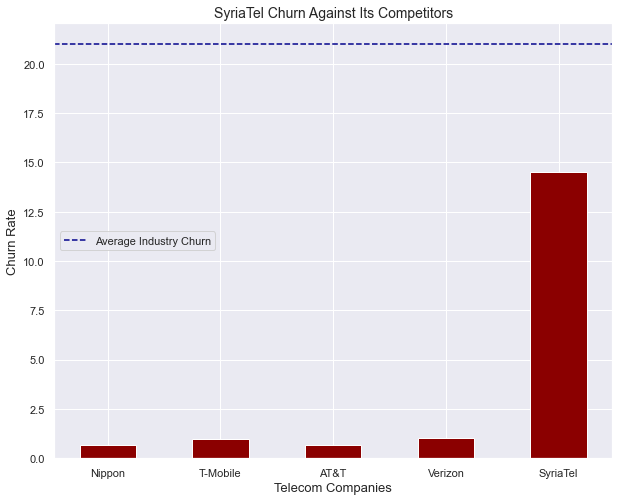

In [28]:
# plot churn comparisons
plt.figure(figsize=(10,8))
plt.bar(top_telecom.keys(), top_telecom.values(), width=.5, color='darkred')
plt.ylabel('Churn Rate', size=13)
plt.xlabel('Telecom Companies',  size=13)
plt.title('SyriaTel Churn Against Its Competitors', size=14)
plt.axhline(21, label='Average Industry Churn', ls='--', color='darkblue')
plt.legend()
fig7 = plt.gcf()
plt.show()
fig7.savefig('fig7', dpi=100)